# Tresholding Algorithms

Soit une image de taille $n \times p$ où l'on veut appliquer un seuil

In [1]:
import numpy as np
from src import main as m, filter as f
from PIL import Image

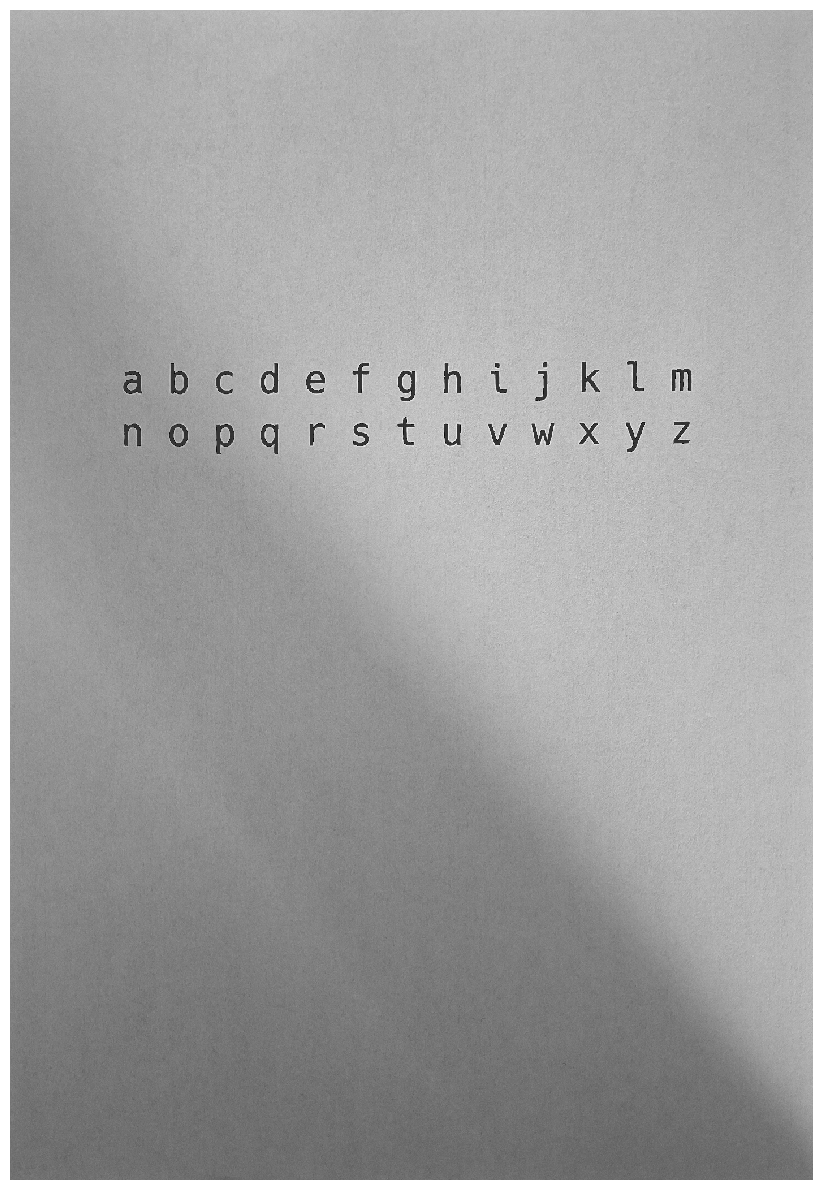

In [2]:
I = np.array(Image.open("export/homographed.png", mode="r").convert('L'))
m.Afficher(I)

## Global Treshold

#### FADIT Method

https://www.mdpi.com/1999-4893/13/2/46

L'objectif est de maximiser une fonction C pour un seuil $\tau$ donné. Chaque pixel de l'image $\in [0, 255]$.

Soit X la variable aléatoire qui vaut la valeur du pixel $(i,j) \in [[1, n]]\times[[1,p]]  $

$$
\begin{aligned}
&X(\Omega) = [0, 255] \\
&\forall k \in [0,255], P(X = k) = \frac{\text{Nombre de pixel de valeur k dans l'image}}{\text{Nombre totale de pixel dans l'image}}
\end{aligned}
$$

$(\set{X \le \tau}, \set{X > \tau})$ est un système complet d'évènement. On peut définit la fonction C. $(1)$

Par le théorème de Bayes, $P(X \le \tau)P_{X \le \tau}(X=k) = P(X=k)P_{X=k}(X \le \tau)$ $(2)$

$$ \begin{aligned}
C(\tau) &= \sum _{k=0} ^{255} P(X=k)^2 \\
&= \sum _{k=0} ^{255} P(X=k)\Big(P(X \le \tau)P_{X \le \tau}(X=k) + P(X > \tau)P_{X > \tau}(X=k)  \Big) & (1) \\
&= \sum _{k=0} ^{255} P(X=k)\Big(P_{X=k}(X \le \tau) + P_{X=k}(X > \tau)\Big) & (2) \\
&= \sum _{k=0} ^{\tau} P(X=k)\underbrace{P_{X=k}(X \le \tau)}_{=1} + \sum _{k=\tau +1} ^{255} P(X=k)\underbrace{P_{X=k}(X > \tau)\Big)}_{=1}
\end {aligned} $$

Donc en maximisant C avec $\tau$. On obtient la meilleur corrélation entre $P(X=k)$ et $P_{X=k}(X \le \tau) + P_{X=k}(X > \tau)$.

$$ \begin{aligned}
& P_{\text{noir}}(\tau) = \sum _{k=0} ^{\tau} P(X=k) \\
& P_{\text{blanc}}(\tau) = \sum _{k=\tau + 1} ^{n} P(X=k)
\end{aligned} $$

On a $P_{\text{noir}}(\tau) + P_{\text{blanc}}(\tau) = 1$

Soit $f_-(\tau)$ une fonction décroissante, $f_+(\tau)$. On définit $C$.

$$ \begin{aligned}
C(\tau) &= P_{\text{blanc}}(\tau) \times f_-(\tau) + P_{\text{noir}}(\tau) \times f_+(\tau) \\
&= P_{\text{blanc}}(\tau) \times f_-(\tau) + (1 - P_{\text{blanc}}(\tau)) \times ( 1 - f_-(\tau)) \\
&= 2P_{\text{blanc}}(\tau) f_-(\tau) - P_{\text{blanc}}(\tau) - f_-(\tau) +1
\end{aligned}$$

On doit ddéterminer la fonction $f_-$. Dans une document, on a les propriétés suivante :
- L'espérence de $X$ correspond à l'intensité général de du document
- Si le fond est fragilisé ou les conditions de prises sont mauvaises, le fond devient plus sombre. Or le texte reste noir.

$f_-$ est une fonction décroissante définie par : $f_-(\tau) = \frac{E(X)}{E(X) + g_+(\tau)} = \frac{E(X)}{E(X) + \frac{\tau(\tau + 1)}{2}(1 - \frac{E(X)}{255})}$. Se valide par l'expérience.

Seuil : 119


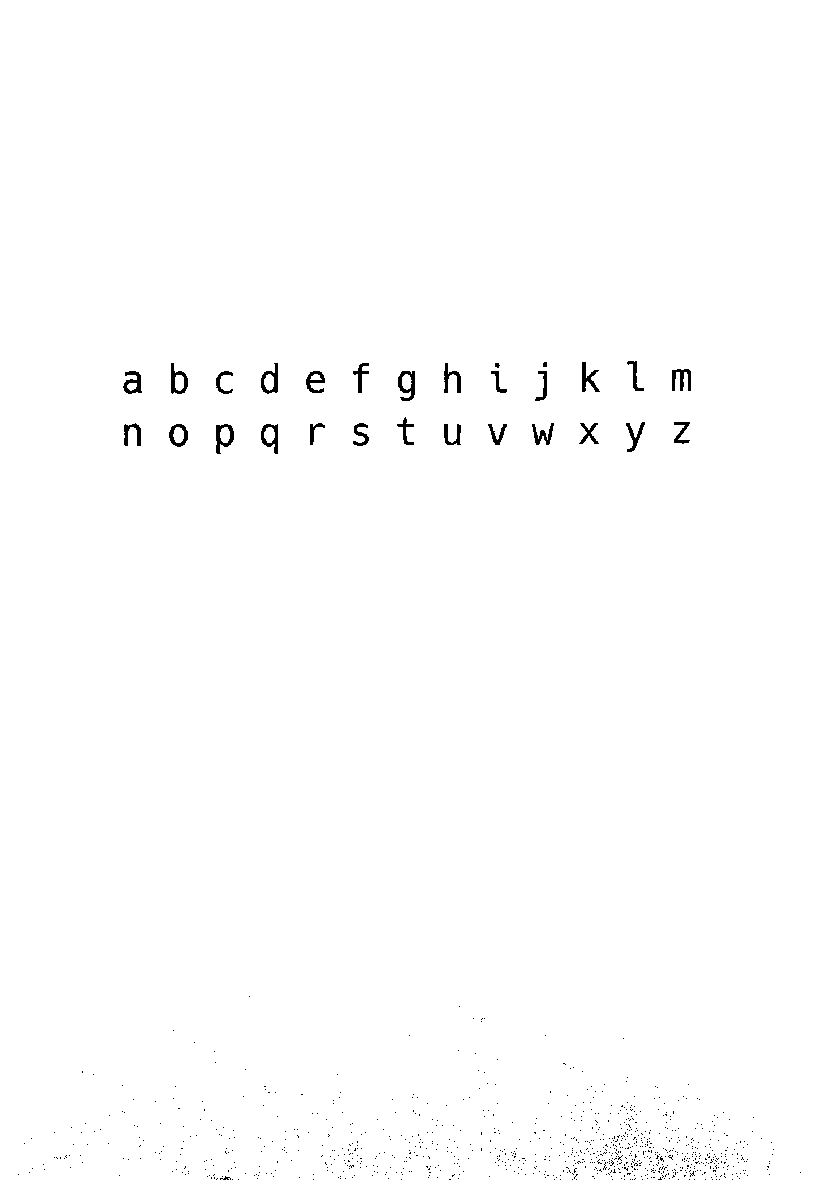

In [3]:
m.Afficher(f.FADIT(I, (2,2)))

**Complexité temporelle:** $\mathcal O (1)$

On doit calculer une fois la valeur moyenne.

## Local Treshold

#### Sauvola Tresholding

Soit $I$ la matrice image de taille $n\times p$.

On cherche une approche locale. On prend $r$ la taille du voisinage.

Soit $(i,j) \in [[\lfloor \frac{r}{2} \rfloor, n-\lfloor \frac{r}{2} \rfloor]] \times [[\lfloor \frac{r}{2} \rfloor, p-\lfloor \frac{r}{2} \rfloor]]$.

On considère le voisinage de ce point $N_{i,j} \in \mathcal M _r(\mathbb Z)$. C'est la matrice de taille $r \times r$ qui reprend les coordonnées du voisinage de $(i,j)$

$$\bar{I}(i,j) = \frac{1}{r^2}\sum _{(x,y)\in [[1, r]]^2} N_{i,j}(x,y)$$

$$\sigma _{i,j} ^2 = \frac{1}{r^2} \sum _{(x,y) \in [[1,r]]^2} (N_{i,j}(x,y) - \bar I(i,j))^2$$

Avec $\bar I (i,j)$ la moyenne du voisinage au point $(i,j)$, $\sigma(i,j)$ l'écart type du voisinage au point $(i,j)$

$$T(i,j) = \bar I (i,j)(1 + k(\frac{\sigma(i,j)}{R} - 1))$$

Avec $T$ la valeur seuil.

$k$ une constante qui permet de controler le seuil en fonction de l'écart type.
Généralement $k = 0.2$. Valeur empirique.

$R = \frac{256}{2} = 128$. C'est la taille de l'écart type. Normalise $\sigma$

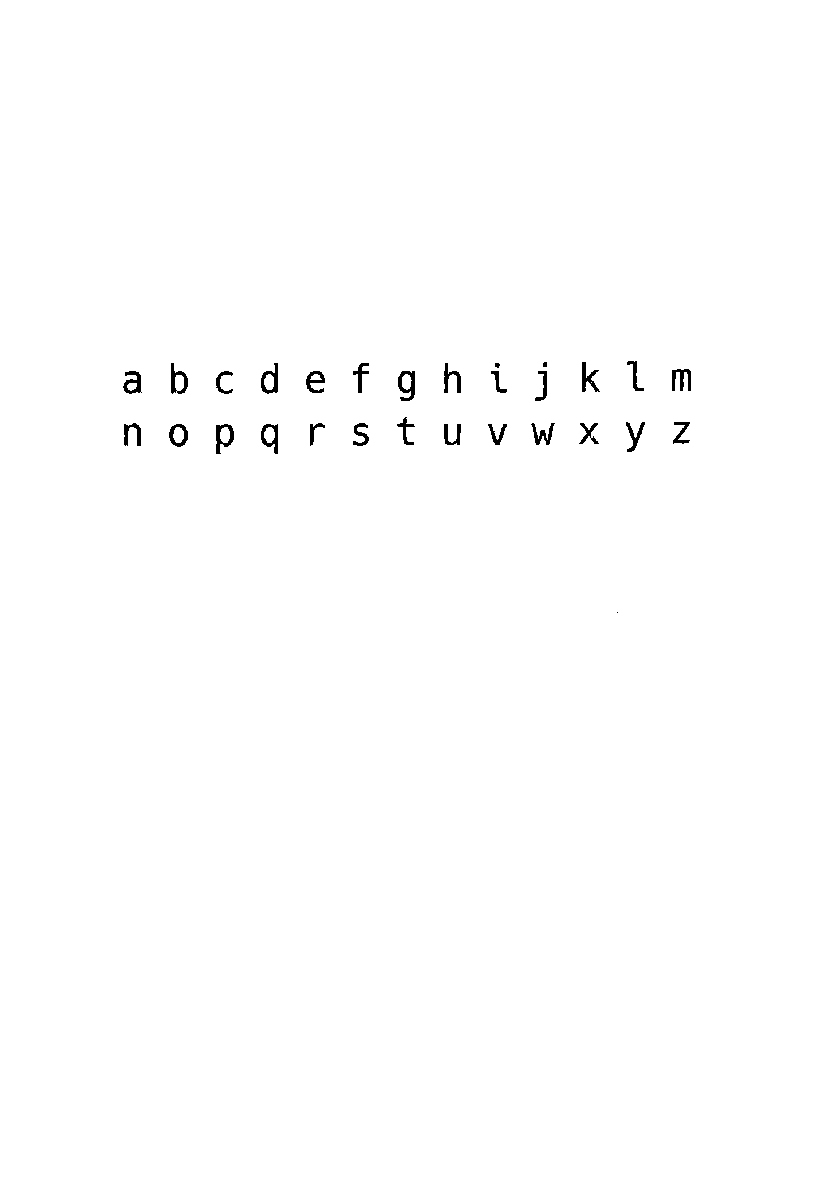

In [4]:
S = f.Sauvola(I, NeighboorSize = 10, StandardDeviationStrength = .2)
m.Afficher(S)
m.SaveAsPng(S, 'export/tresholded.png')

**Complexité temporelle:** $\mathcal O(n\times p \times r^2)$